In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip',parse_dates=[3])
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [4]:
#making a more compatible data
df=df.rename(columns={'SystemCodeNumber':'Location','LastUpdated':'timestamp'})
df['Day']=df.timestamp.dt.date
df['Month']=df.timestamp.dt.month
df['Hour']=df.timestamp.dt.hour
df.head()

,Location,Capacity,Occupancy,timestamp,Day,Month,Hour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,10,7
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,10,8
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,10,8
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,10,9
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,10,9


In [5]:
park=df[df.Location.isin(['Broad Street','NIA South'])]
months=[pd.Timestamp(2016,10,1),
        pd.Timestamp(2016,11,1),
        pd.Timestamp(2016,12,1)]
plt.rc('date.autoformatter',day='%b %Y')

([<matplotlib.axis.XTick at 0x192e0bc2c10>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

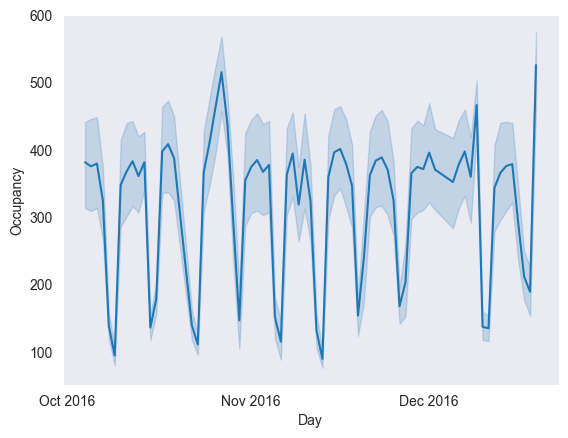

In [6]:
#To see the occupancy during a month
sns.lineplot(x='Day',y='Occupancy',data=park)
plt.xticks(months)

<Axes: xlabel='Hour', ylabel='Occupancy'>

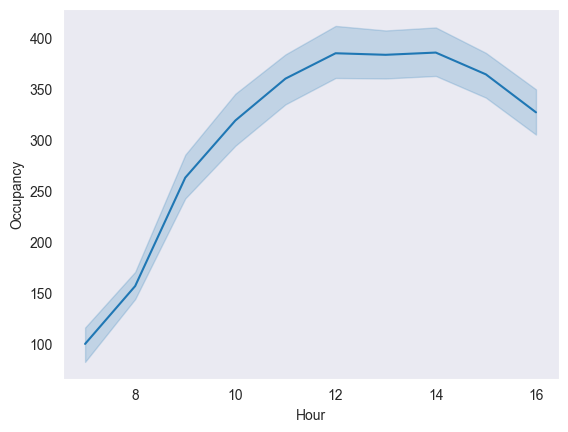

In [7]:
#To see the occupancy throughout a day
sns.lineplot(x='Hour',y='Occupancy',data=park)

<Axes: xlabel='Day', ylabel='Occupancy'>

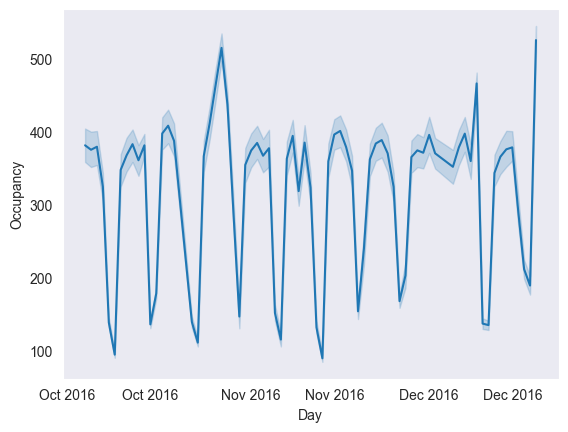

In [8]:
#To change the errorbar(ie the amount of the shaded region)
sns.lineplot(x='Day',y='Occupancy',data=park,errorbar=('ci',50)) #note that the default ci(confidence interval) is 95%

<Axes: xlabel='Day', ylabel='Occupancy'>

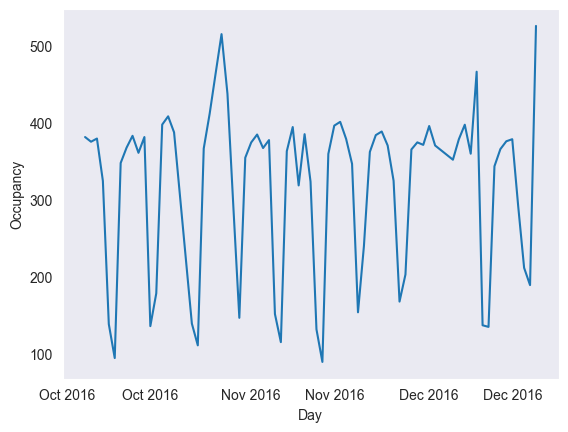

In [9]:
#we can also turn off the shading:
sns.lineplot(x='Day',y='Occupancy',data=park,errorbar=None)

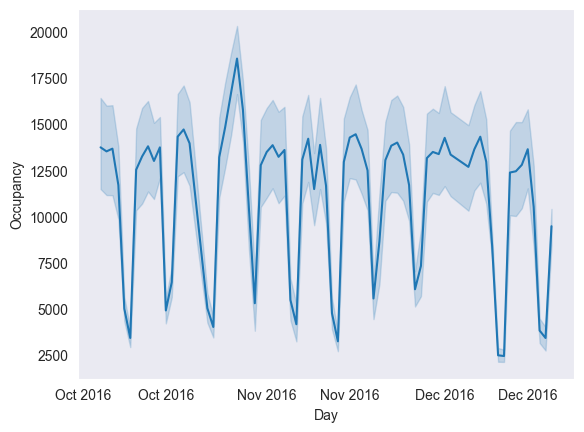

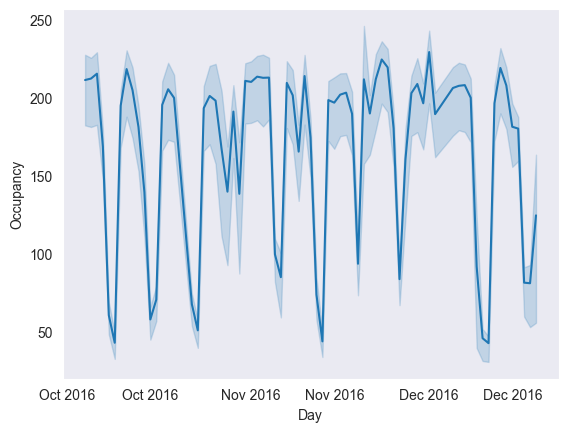

In [10]:
#By default, the line plot shows the mean of the data of every short interval, but we can change this if we want
sns.lineplot(x='Day',y='Occupancy',data=park,estimator='sum') #shows the sum of our data
plt.show()
sns.lineplot(x='Day',y='Occupancy',data=park,estimator='std') #shows the standard deviation of our data
plt.show()

<Axes: xlabel='Day', ylabel='Occupancy'>

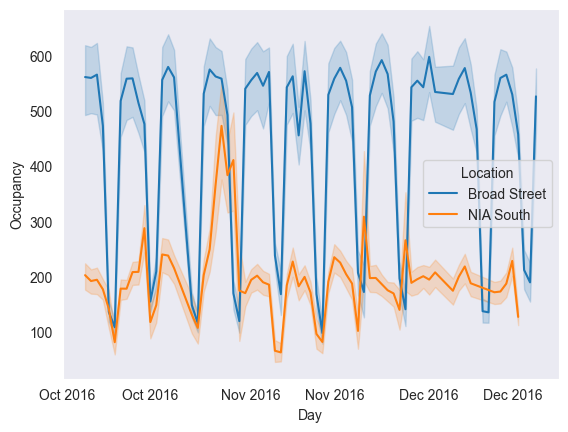

In [11]:
#We can also show more information on our plot by categorising data. Eg:
sns.lineplot(x='Day',y='Occupancy',hue='Location',data=park)

<Axes: xlabel='Day', ylabel='Occupancy'>

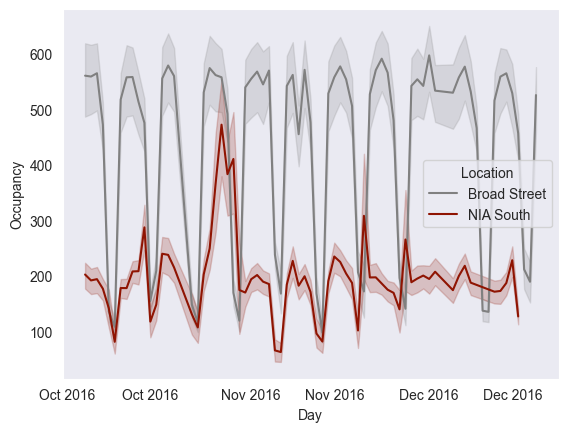

In [12]:
#We can also customise the colors to be used:
sns.lineplot(x='Day',y='Occupancy',hue='Location',data=park,palette=['gray','xkcd:brick red'])

<Axes: xlabel='Day', ylabel='Occupancy'>

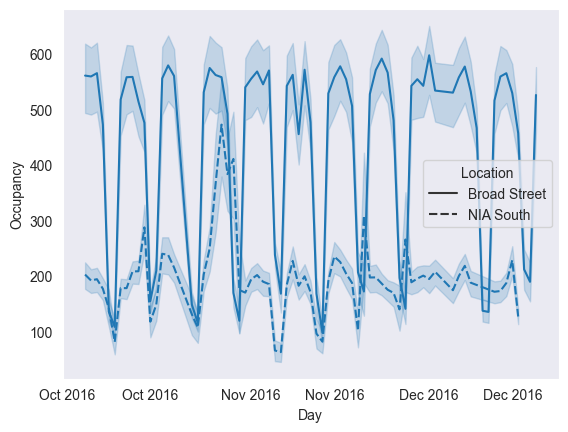

In [13]:
#We can do the same thing by using 2 different types of lines instead of 2 colors
sns.lineplot(x='Day',y='Occupancy',style='Location',data=park)

<Axes: xlabel='Day', ylabel='Occupancy'>

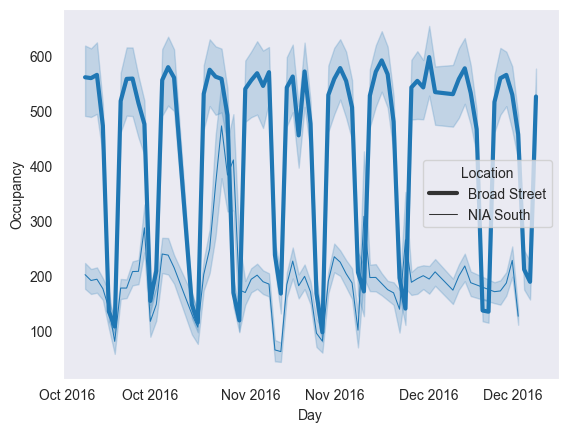

In [14]:
#Another way of doing the same thing is by using lines with different thickness
sns.lineplot(x='Day',y='Occupancy',size='Location',data=park)

<Axes: xlabel='Day', ylabel='Occupancy'>

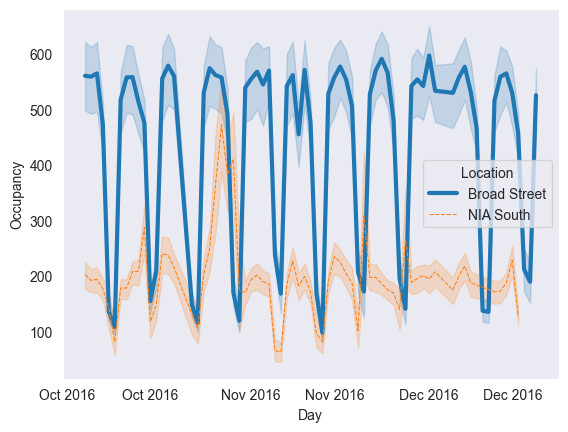

In [15]:
#Also, to make the data more visible, we can use the style, the hue, as well as the size at the same time
sns.lineplot(x='Day',y='Occupancy',style='Location',hue='Location',size='Location',data=park)

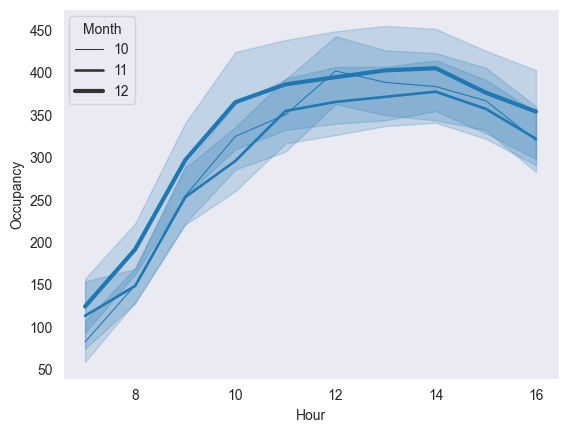

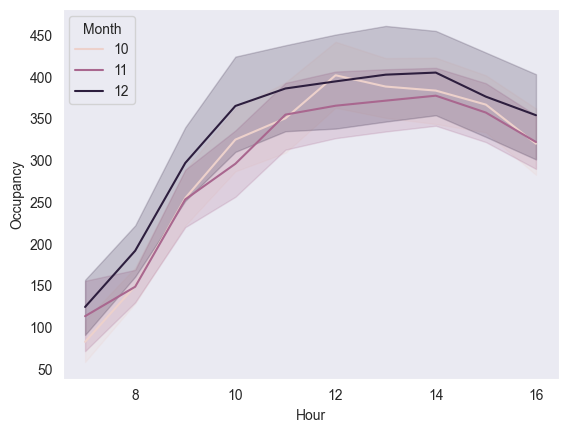

In [16]:
#Both size and hue can be used to express numerical variables as well
sns.lineplot(x='Hour',y='Occupancy',size='Month',data=park)
plt.show()
sns.lineplot(x='Hour',y='Occupancy',hue='Month',data=park)
plt.show()